# RIDGE REGRESSION e LOO

In [2]:
import graphlab
import math
import random
import numpy
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
black = "\033[1;30;48m"
red = "\033[1;31;48m"
blue = "\033[1;34;48m"

In [6]:
data = graphlab.SFrame("Regression/data/kc_house_data.csv")
train_data, test_data = data.random_split(.8,seed=0)

<pre>Finished parsing file /Users/Administrator/Development/GraphLabProjects/ML/Regression/data/kc_house_data.csv</pre>

<pre>Parsing completed. Parsed 100 lines in 0.090545 secs.</pre>

------------------------------------------------------
Inferred types from first 100 line(s) of file as 
column_type_hints=[int,str,float,int,float,int,int,float,int,int,int,int,int,int,int,int,int,float,float,int,int]
If parsing fails due to incorrect types, you can correct
the inferred type list above and pass it to read_csv in
the column_type_hints argument
------------------------------------------------------


<pre>Finished parsing file /Users/Administrator/Development/GraphLabProjects/ML/Regression/data/kc_house_data.csv</pre>

<pre>Parsing completed. Parsed 21613 lines in 0.131608 secs.</pre>

In [10]:
data.head()

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view
7129300520,20141013T000000,221900.0,3,1.0,1180,5650,1.0,0,0
6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0
5631500400,20150225T000000,180000.0,2,1.0,770,10000,1.0,0,0
2487200875,20141209T000000,604000.0,4,3.0,1960,5000,1.0,0,0
1954400510,20150218T000000,510000.0,3,2.0,1680,8080,1.0,0,0
7237550310,20140512T000000,1225000.0,4,4.5,5420,101930,1.0,0,0
1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0
2008000270,20150115T000000,291850.0,3,1.5,1060,9711,1.0,0,0
2414600126,20150415T000000,229500.0,3,1.0,1780,7470,1.0,0,0
3793500160,20150312T000000,323000.0,3,2.5,1890,6560,2.0,0,0


## REGRESSION con graphlab

In [28]:
def polynomial_regression(data, l2 = 0., l1 = 0.):
    model = graphlab.linear_regression.create(data,
                                              target='price',
                                              features=['sqft_living','bedrooms','bathrooms'],
                                              l2_penalty=l2,
                                              l1_penalty=l1,
                                              validation_set=None,
                                              verbose=False)
    return model

METODI di SUPPORTO

In [21]:
def print_coefficients(model):
    grado = len(model.coefficients['value'])-1
    
    w = list(model.coefficients['value'])
    w.reverse()
    
    overfit = False
    
    for peso in w:
        if peso > 1000:
            overfit = True
        
    if overfit == False:
        print(blue + 'Grado ' + str(grado) + ':')
        print numpy.poly1d(w)
    else:
        print(red + 'Grado ' + str(grado) + ':')
        print(numpy.poly1d(w))

## CREAZIONE del MODELLO

· PROVO senza L2

In [29]:
model = polynomial_regression(train_data)
print_coefficients(model)

Grado 3:
      3             2
6942 x - 6.508e+04 x + 315.4 x + 8.791e+04


· PROVO con L2 molto PICCOLO e ricalcolo

In [30]:
model_smallL2 = polynomial_regression(train_data, l2=1e-30)
print_coefficients(model_smallL2)

Grado 3:
      3             2
6942 x - 6.508e+04 x + 315.4 x + 8.791e+04


· PROVO con diversi L2 crescenti e ricalcolo

In [51]:
for l2 in [1e-25, 1e-10, 1e-6, 1e-4, 1e-3, 1e2]:
    model = polynomial_regression(train_data, l2=l2)
    print(black + '\t\t\t\t\tL2 = %.2e' % l2)
    print_coefficients(model)
    print '---------------------------------------------------------------------------\n'

					L2 = 1.00e-25
Grado 3:
      3             2
6942 x - 6.508e+04 x + 315.4 x + 8.791e+04
---------------------------------------------------------------------------

					L2 = 1.00e-10
Grado 3:
      3             2
6942 x - 6.508e+04 x + 315.4 x + 8.791e+04
---------------------------------------------------------------------------

					L2 = 1.00e-06
Grado 3:
      3             2
6942 x - 6.508e+04 x + 315.4 x + 8.791e+04
---------------------------------------------------------------------------



					L2 = 1.00e-04
Grado 3:
      3             2
6942 x - 6.508e+04 x + 315.4 x + 8.791e+04
---------------------------------------------------------------------------

					L2 = 1.00e-03
Grado 3:
      3             2
6942 x - 6.508e+04 x + 315.4 x + 8.791e+04
---------------------------------------------------------------------------



					L2 = 1.00e+02
Grado 3:
           3             2
2.225e+04 x - 5.079e+04 x + 287.4 x + 6.574e+04
---------------------------------------------------------------------------



## LEAVE ONE OUT cross validation 

In [58]:
def loo(data, l2):
    
    num_folds = len(data)/100
    folds = graphlab.cross_validation.KFold(data, num_folds)
    
    l2_penalty_mae = []
    min_mae = None
    best_l2_penalty = None
    
    for l2_value in l2:
        next_mae = 0.0
        for train_set, validation_set in folds:
            
            model = polynomial_regression(train_set, l2=l2_value)
            
            y_test_predicted = model.predict(validation_set)
            next_mae += (abs(y_test_predicted-validation_set['price'])).sum()
        
        print("L2: ", l2_value)
        next_mae = next_mae/num_folds
        l2_penalty_mae.append(next_mae)
        if min_mae is None or next_mae < min_mae:
            min_mae = next_mae
            best_l2_penalty = l2_value
            
    return l2_penalty_mae,best_l2_penalty

Risultati e PLOT

In [62]:
# TODO set -4 to 10
l2 = numpy.logspace(-1, 1, num=10)
l2_penalty_mae,best_l2_penalty = loo(train_data, l2)

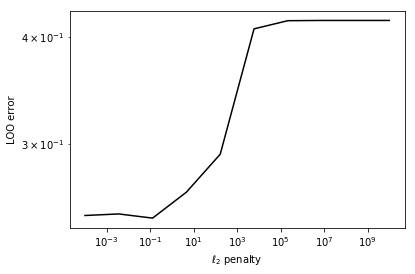

In [25]:
plt.plot(l2,l2_penalty_mae,'k-')
plt.xlabel('$\ell_2$ penalty')
plt.ylabel('LOO error')
plt.xscale('log')
plt.yscale('log')

## RIPETO la REGRESSION con il BEST L2

Grado 14:
       14         13          12          11          10          9
1.844 x  + 1.309 x  + 0.7965 x  + 0.3088 x  - 0.1481 x  - 0.5632 x
           8         7         6         5          4           3
 - 0.9175 x - 1.181 x - 1.304 x - 1.215 x - 0.8217 x - 0.07562 x
           2
 + 0.7818 x + 0.7811 x + 0.3898


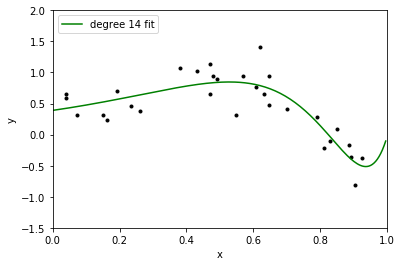

In [26]:
model = polynomial_regression(train_data, l2=best_l2_penalty)
print_coefficients(model)

------------------------------------------------------------------------------------------------------------

------------------------------------------------------------------------------------------------------------

In [27]:
def get_numpy_data(data_sframe, features, output):
    data_sframe['constant'] = 1
    features = ['constant'] + features
    
    features_sframe = data_sframe[features]
    features_matrix = features_sframe.to_numpy()
    
    output_sarray = data_sframe[output]
    output_array = output_sarray.to_numpy()
    
    return(features_matrix, output_array)

In [28]:
def predict_output(feature_matrix, pesi):
    predictions = []
    for col in range(feature_matrix.shape[0]):
        predictions.append(numpy.dot(feature_matrix[col,], pesi))
    return predictions

In [108]:
def feature_derivative(errors, feature):
    derivative = 2*numpy.dot(feature,errors)
    return derivative

In [109]:
def gradient_descent_RR(feature_matrix, output, pesi_iniziali, step_size, l2, tolleranza):
    converged = False
    pesi = numpy.array(pesi_iniziali)
    
    while not converged:
        predictions = predict_output(feature_matrix, pesi)
        errors = predictions - output
        gradient_cost = 0
        
        for i in xrange(len(pesi)):
            derivata = feature_derivative(errors, feature_matrix[ : , i])
            
            if(i==0):
                pesi[i] -= step_size * derivata
                gradient_cost = gradient_cost + derivata**2
            else:
                pesi[i] = (1-2*step_size*l2)*pesi[i] - step_size*derivata
                gradient_cost = gradient_cost + ((derivata + 2*l2*pesi[i])**2)
        
        gradient_magnitude = math.sqrt(gradient_cost)
        print gradient_magnitude
        if gradient_magnitude < tolleranza:
            converged = True
    return pesi

In [98]:
step_size = 7e-12
tolerance = 2.5e7

Grado 16:
            16             15             14            13
-4.537e+05 x  + 1.129e+06 x  + 4.821e+05 x  - 3.81e+06 x 
              12             11             10             9
 + 3.536e+06 x  + 5.753e+04 x  - 1.796e+06 x  + 2.178e+06 x
              8             7            6             5             4
 - 3.662e+06 x + 4.442e+06 x - 3.13e+06 x + 1.317e+06 x - 3.356e+05 x
             3        2
 + 5.06e+04 x - 4183 x + 160.8 x - 1.621


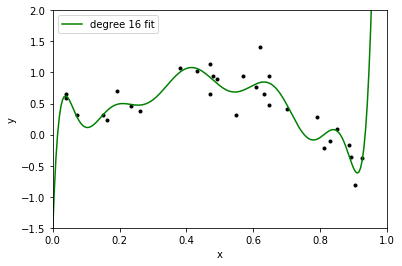

In [97]:
model_2 = polynomial_regression(data_noise, grado=16, l2=1e-25)
print_coefficients(model_2)
plot_poly_predictions(data_noise, model_2)

In [110]:
(features_matrix, output_array) = get_numpy_data(data_noise, ['X1'], 'Y')
pesi_iniziali = numpy.array([-47000., 1.])
pesi = gradient_descent_RR(features_matrix, output_array, pesi_iniziali ,step_size, best_l2_penalty ,tolerance)
print pesi

3183943.68373
[ -4.70000000e+04   1.00001035e+00]
